# PRACTICA DE NLP

## Analisis de sentimiento

### Dataset Review de Amazon

Reviews de productos de Amazon clasificadas por categorías (Deportes y actividades al aire libre). Las reviews contienen la calificación (número de estrellas)

# 1. Descarga y exploración del corpus

In [1]:
import os
import json
import gzip
import pandas as pd
from collections import Counter # Exploración
from nltk import ngrams # Exploración
from nltk.probability import FreqDist # Exploración

import matplotlib.pyplot as plt

In [2]:
# Descargar el archvivo desde el repositorio

# URL del dataset
url_del_dataset = 'http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Sports_and_Outdoors_5.json.gz'

# Rutas locales para guardar el archivo comprimido y descomprimido
ruta_comprimido = '/content/reviews_Sports_and_Outdoors_5.json.gz'
ruta_descomprimido = '/content/reviews_Sports_and_Outdoors_5.json'

# Descargar el archivo
print("Descargando dataset...")
!wget -O {ruta_comprimido} {url_del_dataset}
print("Descarga completada.")

# Descomprimir el archivo
print("Descomprimiendo archivo...")
with gzip.open(ruta_comprimido, 'rb') as f_in:
    with open(ruta_descomprimido, 'wb') as f_out:
        f_out.write(f_in.read())
print("Archivo descomprimido correctamente.")


Descargando dataset...
--2024-12-05 23:01:00--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Sports_and_Outdoors_5.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68275834 (65M) [application/x-gzip]
Saving to: ‘/content/reviews_Sports_and_Outdoors_5.json.gz’

/content/reviews_Sp 100%[===================>]  65.11M  9.44MB/s    in 7.9s    

2024-12-05 23:01:08 (8.22 MB/s) - ‘/content/reviews_Sports_and_Outdoors_5.json.gz’ saved [68275834/68275834]

Descarga completada.
Descomprimiendo archivo...
Archivo descomprimido correctamente.


In [3]:
# cargamos el dataset en un dataframe

# Crear un dataset balanceado de x reseñas positivas y x negativas
# Número de registros positivos y negativos deseados
max_registros = 3500

registros_positivos = []
registros_negativos = []

print("Procesando archivo JSON...")
with open(ruta_descomprimido, 'r') as archivo:
    for linea in archivo:
        # Leer cada línea como un diccionario
        registro = json.loads(linea)
        overall = registro.get('overall')  # Obtener la calificación (1 a 5)
        if overall is not None:
            # Clasificar como positivo o negativo según la calificación
            if overall >= 4 and len(registros_positivos) < max_registros:
                registros_positivos.append(registro)
            elif overall <= 3 and len(registros_negativos) < max_registros:
                registros_negativos.append(registro)
        # Salir del bucle si se alcanzan los límites
        if len(registros_positivos) >= max_registros and len(registros_negativos) >= max_registros:
            break

# Combinar las listas en un DataFrame
df_positivos = pd.DataFrame(registros_positivos)
df_negativos = pd.DataFrame(registros_negativos)
df = pd.concat([df_positivos, df_negativos]).reset_index(drop=True)

print(f"Dataset balanceado creado con {len(df_positivos)} positivos y {len(df_negativos)} negativos.")

# Guardar el DataFrame como un archivo CSV en Colab
ruta_csv = '/content/dataset_balanceado.csv'
df.to_csv(ruta_csv, index=False)
print(f"Dataset guardado en {ruta_csv}.")

# Mostrar enlaces de descarga del archivo CSV para exportar
from google.colab import files
files.download(ruta_csv)


Procesando archivo JSON...
Dataset balanceado creado con 3500 positivos y 3500 negativos.
Dataset guardado en /content/dataset_balanceado.csv.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5.0,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5.0,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4.0,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4.0,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4.0,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"
5,A2XX2A4OJCDNLZ,1881509818,RatherLiveInKeyWest,"[0, 0]","Needed this tool to really break down my G22, ...",5.0,Glock punch tool - needed for your Glock and o...,1351814400,"11 2, 2012"
6,A283UOBQRUNM4Q,1881509818,Thomas Dragon,"[0, 0]",If u don't have it .. Get it. All you need to ...,5.0,Great tool,1402358400,"06 10, 2014"
7,AWG3H90WVZ0Z1,2094869245,Alec Nelson,"[0, 0]",This light will no doubt capture the attention...,4.0,Bright!,1377907200,"08 31, 2013"
8,A3V52OTJHKIJZX,2094869245,"A. Saenz Jr. ""Bettering self""","[0, 1]","Light and laser torch work well, very bright. ...",5.0,Be seen,1369612800,"05 27, 2013"
9,A3SZBE5F3UQ9EC,2094869245,"ChasRat ""ChasRat""","[0, 0]",Does everything it says it will do. I would li...,5.0,Bicycle rear tail light,1383350400,"11 2, 2013"


# Análisis Exploratorio

In [5]:
# Filtrar las columnas deseadas del Data Frame
df = df[['reviewText', 'overall']]
df.head(10)

,reviewText,overall
0,This came in on time and I am veru happy with ...,5.0
1,I had a factory Glock tool that I was using fo...,5.0
2,If you don't have a 3/32 punch or would like t...,4.0
3,This works no better than any 3/32 punch you w...,4.0
4,I purchased this thinking maybe I need a speci...,4.0
5,"Needed this tool to really break down my G22, ...",5.0
6,If u don't have it .. Get it. All you need to ...,5.0
7,This light will no doubt capture the attention...,4.0
8,"Light and laser torch work well, very bright. ...",5.0
9,Does everything it says it will do. I would li...,5.0


Convertimos a minúsculas y tokenizamos por espacios

In [6]:
splitted_reviews = df['reviewText'].str.lower().str.split()

In [7]:
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)

In [8]:
vocabulary_ = Counter(words)

In [9]:
len(vocabulary_)

42495

### Distribución de reviews por sentimiento

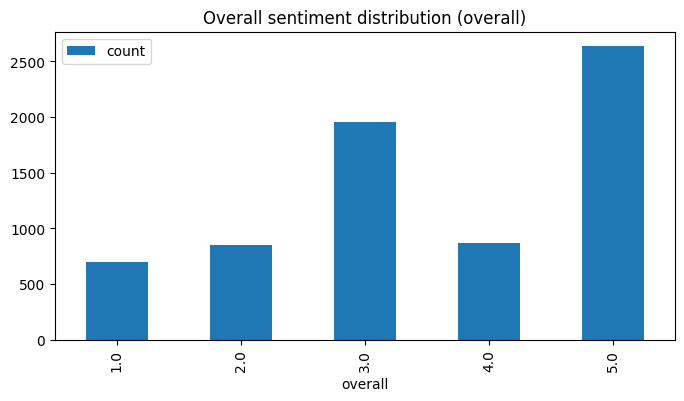

In [10]:
aux_df = pd.DataFrame(df['overall'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (overall)', figsize=(8, 4))

In [11]:
def label_sentiment(row):
    if int(row['overall']) <= 3:
        return 0
    else:
        return 1

In [12]:
df['sentiment'] = df.apply(lambda row: label_sentiment(row), axis=1)

In [13]:
df.head(-10)

,reviewText,overall,sentiment
0,This came in on time and I am veru happy with ...,5.0,1
1,I had a factory Glock tool that I was using fo...,5.0,1
2,If you don't have a 3/32 punch or would like t...,4.0,1
3,This works no better than any 3/32 punch you w...,4.0,1
4,I purchased this thinking maybe I need a speci...,4.0,1
...,...,...,...
6985,I had to send back because the S M size is too...,1.0,0
6986,I installed the toe clips and went out for a r...,1.0,0
6987,,1.0,0
6988,WHAT I LIKE:- Great cheap replacement for the ...,3.0,0


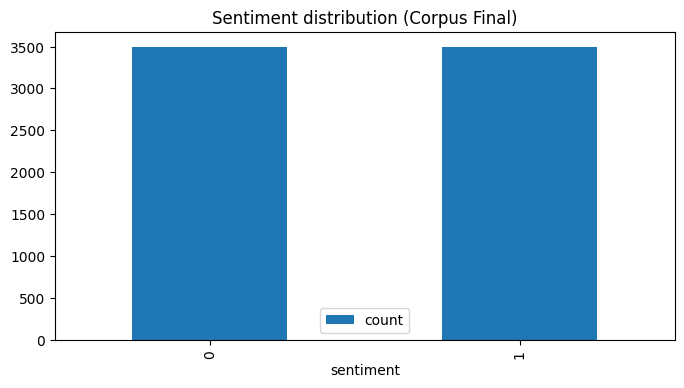

In [14]:
aux_df = pd.DataFrame(df['sentiment'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Sentiment distribution (Corpus Final)', figsize=(8, 4))

He descargado 3500 muestras positivas y 3500 muestras negativas, para tener un corpus balanceado.

# N-grams más frecuentes

Realizamos el cálculo de los 2-gramas y 3-grams directamente de la Series de pandas con todas las palabras. Al estar interesados únicamente en los más frecuentes no habrá problemas al combinar el último token de una review con el token inicial de la siguiente. Esto nos permite agilizar el cómputo en esta etapa previa de exploración.

In [15]:
bigrams_ = ngrams(words, 2)
trigrams_ = ngrams(words, 3)

In [16]:
bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

In [17]:
bigrams_freq_.most_common(10)

[(('of', 'the'), 2388),
 (('in', 'the'), 1841),
 (('it', 'is'), 1738),
 (('on', 'the'), 1640),
 (('i', 'have'), 1570),
 (('is', 'a'), 1294),
 (('if', 'you'), 1268),
 (('for', 'the'), 1188),
 (('this', 'is'), 1121),
 (('and', 'the'), 1091)]

In [18]:
trigrams_freq_.most_common(10)

[(('this', 'is', 'a'), 397),
 (('a', 'lot', 'of'), 281),
 (('out', 'of', 'the'), 242),
 (('i', 'bought', 'this'), 239),
 (('if', 'you', 'are'), 210),
 (('it', 'is', 'a'), 208),
 (('i', 'had', 'to'), 182),
 (('one', 'of', 'the'), 177),
 (('i', 'have', 'a'), 165),
 (('if', 'you', 'have'), 153)]

Parece evidente que la eliminación de stopwords es necesaria.

Nube de palabras para reseñas positivas:


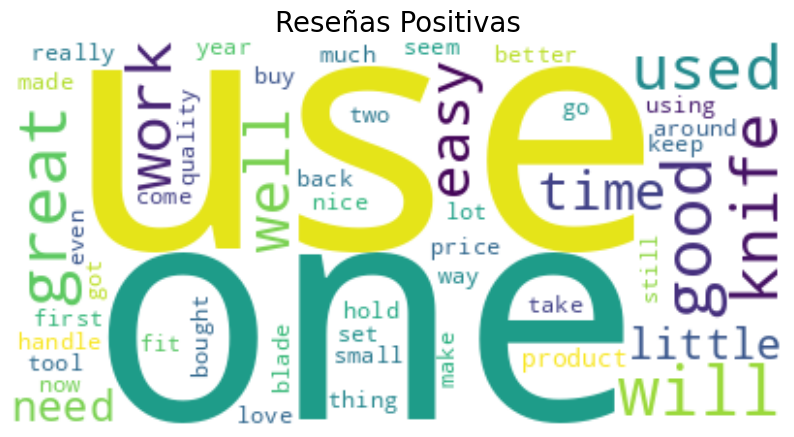

Nube de palabras para reseñas negativas:


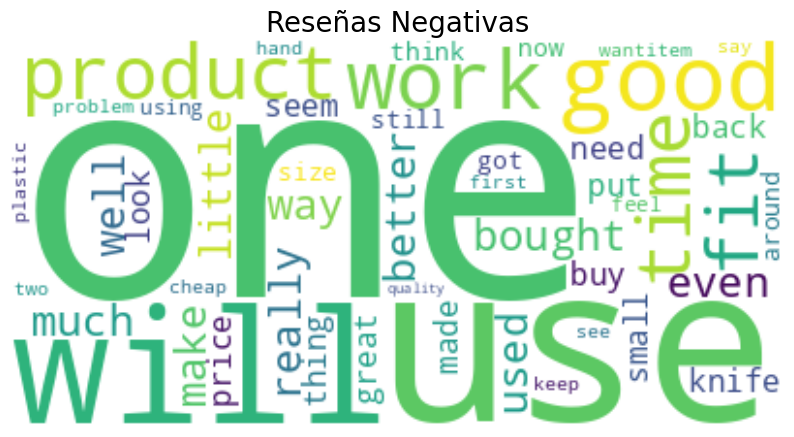

In [19]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Función para generar y mostrar la nube de palabras según el sentimiento
def generar_nube_palabras(df, sentiment, title):
    # Filtrar las reseñas por sentimiento (1: positivo, 0: negativo)
    reviews = df[df['sentiment'] == sentiment]['reviewText']

    # Combinamos las reseñas en un solo texto
    combined_text = " ".join(reviews.dropna())

    # Inicializamos el WordCloud con configuraciones personalizadas
    wc = WordCloud(
        background_color='white',
        max_words=50,
        stopwords=STOPWORDS.update(['sports', 'outdoors', 'train', 'running', 'gym'])
    )

    # Generamos la nube de palabras
    wordcloud = wc.generate(combined_text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Generar nube de palabras para sentimientos positivos
print("Nube de palabras para reseñas positivas:")
generar_nube_palabras(df, sentiment=1, title="Reseñas Positivas")

# Generar nube de palabras para sentimientos negativos
print("Nube de palabras para reseñas negativas:")
generar_nube_palabras(df, sentiment=0, title="Reseñas Negativas")


# Conclusiones de la exploración

##Para el preprocesado:

- Eliminar stopwords: Se eliminarán palabras comunes como "one", "will", "use", etc., que no aportan información útil.
- Eliminar signos de puntuación y símbolos: Los caracteres especiales y signos de puntuación generan ruido y deben eliminarse.
- Normalizar el texto: Convertir todo a minúsculas para evitar duplicados como This y this.
- Eliminar textos vacíos o irrelevantes: Filtrar filas sin contenido en la columna reviewText.
- Personalizar stopwords: Incluir palabras frecuentes pero poco informativas del contexto, como "product", "time" o "good".
- Aplicar lematización: Convertir palabras a su forma base (e.g., bought → buy) para mejorar el análisis.

Estos pasos facilitarán un análisis más limpio y enfocado en el contenido relevante.

In [21]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('dataset_sentiment.csv', index=False)
print("Archivo CSV guardado.")

from google.colab import files

# Guardar y descargar el archivo CSV
df.to_csv('dataset_sentiment.csv', index=False)
files.download('dataset_sentiment.csv')


Archivo CSV guardado.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>